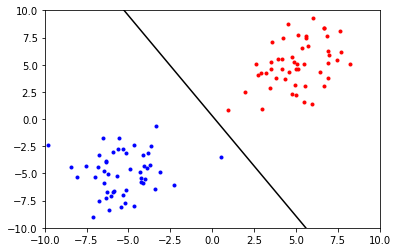

w = [[-0.03308233]
 [-0.01795313]] 



In [4]:
#coding: utf-8

import numpy as np
import matplotlib.pyplot as plt

DIM = 2 #データの次元数

#直線の式
def f(x, a, b):
    return a*x+b

#図示
def plot(cls1, cls2, line=None):
    x,y = cls1.T
    plt.plot(x, y, 'bo', ms=3, label='class1')
    x, y = cls2.T
    plt.plot(x, y, 'ro', ms=3, label='class2')

    if not (line is None):
        plt.plot(line[0], line[1], 'k-', ms=5)

    plt.xlim(-10,10)
    plt.ylim(-10,10)

    plt.show()

def fisher(cls1, cls2):
    #リストからnp.arrayに変換（行列の転置や逆行列を扱うため）
    cls1 = np.array(cls1)
    cls2 = np.array(cls2)

    #各クラスの平均値
    mean1 = np.mean(cls1, axis=0)
    mean2 = np.mean(cls2, axis=0)

    #総クラス内共分散行列
    sw = np.zeros((DIM,DIM))
    for xn in cls1:
        xn = xn.reshape(DIM,1)
        mean1 = mean1.reshape(DIM,1)
        sw += np.dot((xn-mean1),(xn-mean1).T)
    for xn in cls2:
        xn = xn.reshape(DIM,1)
        mean2 = mean2.reshape(DIM,1)
        sw += np.dot((xn-mean2),(xn-mean2).T)

    #総クラス内共分散行列の逆行列
    sw_inv = np.linalg.inv(sw)

    #wを求める
    w = np.dot(sw_inv,(mean1-mean2))

    #決定境界直線を図示する
    mean = (mean1 + mean2)/2 #平均値の中点
    a = -w[0]/w[1] #wと直交する
    b = a*mean[0]+mean[1]
    x = np.linspace(-8, 8, 1000)
    y = f(x,a,b)

    plot(cls1, cls2, (x,y))

    return w

if __name__ == '__main__':
    #テスト用2次元データ
    cov = [[3,1],[1,3]] #共分散
    cls1 = np.random.multivariate_normal([-5,-5], cov, 50)
    cls2 = np.random.multivariate_normal([5,5], cov, 50)

    #fisherで線形変換ベクトルwを求める
    w = fisher(cls1, cls2)
    print('w =', w, '\n')

In [3]:
mean1

NameError: name 'mean1' is not defined

In [5]:
mean1 = np.mean(cls1, axis=0)

In [6]:
mean1

array([-5.3532217 , -4.95942808])

In [7]:
cls1

array([[ 0.55780134, -3.4627635 ],
       [-5.60173565, -2.7456964 ],
       [-5.87315991, -6.60614328],
       [-4.25267091, -5.44754412],
       [-5.20838017, -7.75233922],
       [-3.99789034, -5.51804313],
       [-9.81944844, -2.36852485],
       [-5.92871869, -6.7288124 ],
       [-4.30114936, -4.85572142],
       [-6.43356325, -4.76189922],
       [-6.75344688, -7.52163138],
       [-5.12257013, -3.09651125],
       [-6.82919029, -4.43858511],
       [-8.09339808, -5.33828008],
       [-3.85221091, -3.07939818],
       [-5.47082052, -8.09313231],
       [-6.74675005, -3.30426795],
       [-3.8949479 , -4.45440756],
       [-5.32473428, -2.73573376],
       [-6.34713965, -7.29731389],
       [-5.93837797, -3.05100508],
       [-7.51349173, -4.33826462],
       [-6.23393419, -5.07356741],
       [-5.66606048, -5.2644163 ],
       [-4.88518228, -4.62007912],
       [-6.30471581, -6.69536952],
       [-5.12898059, -6.56127437],
       [-6.31705989, -3.95081838],
       [-4.11309327,

In [ ]:
for xn in cls1:
    print(xn)